In [2]:
from ftplib import FTP
import os
destdir='//home///shreyansh//python programs//sea and ice project'
directory = '/DATASETS/NOAA/G02135/north/daily/data'
password = 'sunnytyagi886@gmail.com'

ftpdir = 'sidads.colorado.edu'
print('Logging in')
ftp = FTP(ftpdir)
ftp.login('anonymous',password)
print('Changing to '+ directory)
ftp.cwd(directory)
files = ftp.nlst()
files = files[2:]
print(files)
os.chdir(destdir)
for file in files:
    print('Downloading...' + file)
    ftp.retrbinary('RETR ' + file, open(file, 'wb').write)
ftp.quit()

Logging in
Changing to /DATASETS/NOAA/G02135/north/daily/data
['N_seaice_extent_climatology_1981-2010_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv.bak']
Downloading...N_seaice_extent_climatology_1981-2010_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv.bak


'221-Goodbye. You uploaded 0 and downloaded 3816 kbytes.\n221 Logout.'

In [10]:
import pandas
help(pandas)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [3]:
import pandas as pd
df = pd.read_csv("//home//shreyansh/python programs//sea and ice project//sea and ice.csv", usecols = ['Extent'])
print(df)
print(type(df))

       Extent
0      10.231
1      10.420
2      10.557
3      10.670
4      10.777
...       ...
14051   7.791
14052   7.903
14053   8.005
14054   8.077
14055   8.132

[14056 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [5]:
import pandas as pd
import numpy as numpy
import csv as csv
path_to_import ='//home//shreyansh/python programs//sea and ice project//sea and ice.csv'
import_file = pd.read_csv(path_to_import,engine='python',encoding='utf-8-sig')

headers = pd.read_csv(path_to_import,nrows=0).columns.tolist()
print(headers)
columns = ['Extent']

path_to_selected = '//home//shreyansh/python programs//sea and ice project//extent_fetched.csv'
pd.read_csv(path_to_import,usecols=columns, sep=',').to_csv('extent_fetched.csv', index=False)

['Year', 'Month', 'Day', 'Extent', '    Missing', ' Source Data']


In [14]:
from pandas import *
from datetime import date
data=pd.read_csv("//home//shreyansh/python programs//sea and ice project//sea and ice.csv")
year=data['Year'].tolist()
month=data['Month'].tolist()
day=data['Day'].tolist()
extent=data['Extent'].tolist()
fetched_date=[]
def func_date(year,month,day):
    fetched_date.append(date(year,month,day))
    
diction=list(zip(year,month,day))
for i in range(len(diction)):
    func_date(diction[i][0],diction[i][1],diction[i][2])
print(fetched_date)

[datetime.date(1978, 10, 26), datetime.date(1978, 10, 28), datetime.date(1978, 10, 30), datetime.date(1978, 11, 1), datetime.date(1978, 11, 3), datetime.date(1978, 11, 5), datetime.date(1978, 11, 7), datetime.date(1978, 11, 9), datetime.date(1978, 11, 11), datetime.date(1978, 11, 13), datetime.date(1978, 11, 15), datetime.date(1978, 11, 17), datetime.date(1978, 11, 19), datetime.date(1978, 11, 21), datetime.date(1978, 11, 23), datetime.date(1978, 11, 25), datetime.date(1978, 11, 27), datetime.date(1978, 11, 29), datetime.date(1978, 12, 1), datetime.date(1978, 12, 3), datetime.date(1978, 12, 5), datetime.date(1978, 12, 7), datetime.date(1978, 12, 9), datetime.date(1978, 12, 11), datetime.date(1978, 12, 13), datetime.date(1978, 12, 15), datetime.date(1978, 12, 17), datetime.date(1978, 12, 19), datetime.date(1978, 12, 21), datetime.date(1978, 12, 23), datetime.date(1978, 12, 25), datetime.date(1978, 12, 27), datetime.date(1978, 12, 29), datetime.date(1978, 12, 31), datetime.date(1979, 1, 

In [7]:
regular_data=list(zip(fetched_date,extent))
print(regular_data)

[(datetime.date(1978, 10, 26), 10.231), (datetime.date(1978, 10, 28), 10.42), (datetime.date(1978, 10, 30), 10.557), (datetime.date(1978, 11, 1), 10.67), (datetime.date(1978, 11, 3), 10.777), (datetime.date(1978, 11, 5), 10.968), (datetime.date(1978, 11, 7), 11.08), (datetime.date(1978, 11, 9), 11.189), (datetime.date(1978, 11, 11), 11.314), (datetime.date(1978, 11, 13), 11.46), (datetime.date(1978, 11, 15), 11.539), (datetime.date(1978, 11, 17), 11.696), (datetime.date(1978, 11, 19), 11.87), (datetime.date(1978, 11, 21), 12.053), (datetime.date(1978, 11, 23), 12.274), (datetime.date(1978, 11, 25), 12.441), (datetime.date(1978, 11, 27), 12.662), (datetime.date(1978, 11, 29), 12.684), (datetime.date(1978, 12, 1), 12.725), (datetime.date(1978, 12, 3), 12.66), (datetime.date(1978, 12, 5), 12.785), (datetime.date(1978, 12, 7), 13.051), (datetime.date(1978, 12, 9), 13.143), (datetime.date(1978, 12, 11), 13.437), (datetime.date(1978, 12, 13), 13.603), (datetime.date(1978, 12, 15), 13.649), (

In [16]:
from datetime import date
fetched_extent,regular_extent,regular_date=[],[],[]
for i in range(1,len(regular_data)):
    if (regular_data[i][0]-regular_data[i-1][0]).days==1:
        fetched_extent.append(regular_data[i])
        regular_extent.append(regular_data[i][1])
        regular_date.append(regular_data[i][0])
        
print(fetched_extent)        


[(datetime.date(1987, 8, 21), 7.21), (datetime.date(1987, 8, 22), 7.21), (datetime.date(1987, 8, 23), 7.265), (datetime.date(1987, 8, 24), 7.216), (datetime.date(1987, 8, 25), 7.157), (datetime.date(1987, 8, 26), 7.145), (datetime.date(1987, 8, 27), 7.079), (datetime.date(1987, 8, 28), 7.123), (datetime.date(1987, 8, 29), 7.041), (datetime.date(1987, 8, 30), 7.019), (datetime.date(1987, 8, 31), 7.072), (datetime.date(1987, 9, 1), 6.967), (datetime.date(1987, 9, 2), 6.89), (datetime.date(1987, 9, 3), 6.909), (datetime.date(1987, 9, 4), 7.008), (datetime.date(1987, 9, 5), 7.041), (datetime.date(1987, 9, 6), 7.059), (datetime.date(1987, 9, 7), 7.087), (datetime.date(1987, 9, 8), 7.041), (datetime.date(1987, 9, 9), 7.145), (datetime.date(1987, 9, 10), 7.106), (datetime.date(1987, 9, 11), 7.121), (datetime.date(1987, 9, 12), 7.127), (datetime.date(1987, 9, 13), 7.174), (datetime.date(1987, 9, 14), 7.19), (datetime.date(1987, 9, 15), 7.177), (datetime.date(1987, 9, 16), 7.117), (datetime.dat

In [12]:
print(regular_date) 

[datetime.date(1987, 8, 21), datetime.date(1987, 8, 22), datetime.date(1987, 8, 23), datetime.date(1987, 8, 24), datetime.date(1987, 8, 25), datetime.date(1987, 8, 26), datetime.date(1987, 8, 27), datetime.date(1987, 8, 28), datetime.date(1987, 8, 29), datetime.date(1987, 8, 30), datetime.date(1987, 8, 31), datetime.date(1987, 9, 1), datetime.date(1987, 9, 2), datetime.date(1987, 9, 3), datetime.date(1987, 9, 4), datetime.date(1987, 9, 5), datetime.date(1987, 9, 6), datetime.date(1987, 9, 7), datetime.date(1987, 9, 8), datetime.date(1987, 9, 9), datetime.date(1987, 9, 10), datetime.date(1987, 9, 11), datetime.date(1987, 9, 12), datetime.date(1987, 9, 13), datetime.date(1987, 9, 14), datetime.date(1987, 9, 15), datetime.date(1987, 9, 16), datetime.date(1987, 9, 17), datetime.date(1987, 9, 18), datetime.date(1987, 9, 19), datetime.date(1987, 9, 20), datetime.date(1987, 9, 21), datetime.date(1987, 9, 22), datetime.date(1987, 9, 23), datetime.date(1987, 9, 24), datetime.date(1987, 9, 25), 

In [53]:
print(regular_extent)

[7.21, 7.21, 7.265, 7.216, 7.157, 7.145, 7.079, 7.123, 7.041, 7.019, 7.072, 6.967, 6.89, 6.909, 7.008, 7.041, 7.059, 7.087, 7.041, 7.145, 7.106, 7.121, 7.127, 7.174, 7.19, 7.177, 7.117, 7.223, 7.205, 7.233, 7.353, 7.397, 7.459, 7.51, 7.571, 7.648, 7.665, 7.653, 7.694, 7.757, 7.834, 8.039, 8.221, 8.311, 8.508, 8.486, 8.587, 8.635, 8.675, 8.691, 8.851, 8.874, 8.837, 8.984, 9.088, 8.996, 8.997, 9.04, 9.046, 9.141, 9.228, 9.322, 9.441, 9.471, 9.498, 9.468, 9.448, 9.478, 9.587, 9.709, 9.867, 9.988, 10.163, 10.214, 10.256, 10.297, 10.381, 10.404, 10.482, 10.599, 10.679, 10.771, 10.89, 10.973, 11.139, 11.203, 11.302, 11.436, 11.508, 11.448, 11.485, 11.592, 11.635, 11.712, 11.745, 11.847, 11.934, 12.003, 12.073, 12.137, 12.185, 12.228, 12.497, 12.584, 14.854, 14.973, 14.987, 15.0, 15.051, 15.047, 15.049, 15.113, 15.09, 15.085, 15.022, 15.02, 15.115, 15.163, 15.241, 15.278, 15.362, 15.443, 15.56, 15.568, 15.462, 15.479, 15.413, 15.448, 15.313, 15.309, 15.276, 15.304, 15.292, 15.326, 15.332, 15.

In [57]:
print(f'length of regularity in extent: {len(regular_extent)}')
print(f'date from when the data is regular: {fetched_extent[0][0]}')

length of regularity in extent: 12443
date from when the data is regular: 1987-08-21


In [13]:
import pandas as pd 
dict = {'Date': regular_date, 'Extent':regular_extent}      
df = pd.DataFrame(dict)  
df.to_csv('REGULAR_DATE_EXTENT.csv') 

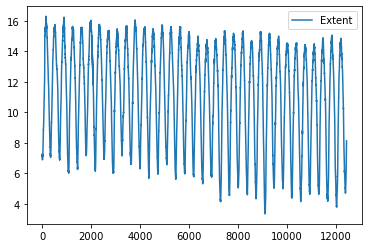

In [11]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

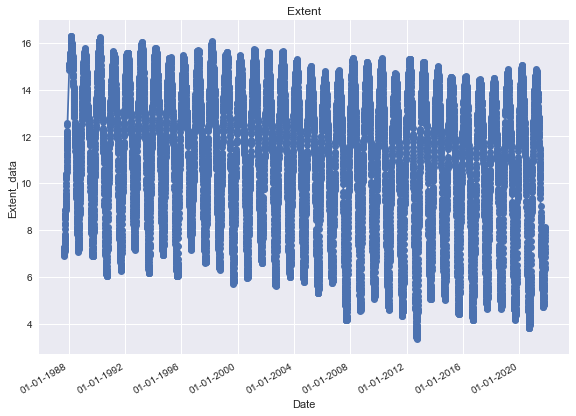

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
plt.style.use('seaborn')

data = pd.read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
extent_date=data['Date']
extent= data['Extent']
plt.plot_date(extent_date, extent, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Extent')
plt.xlabel('Date')
plt.ylabel('Extent_data')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
data = pd.read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv')  # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


ValueError: could not convert string to float: '1987-08-21'

In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
df = pd.read_csv("//home//shreyansh/python programs//sea and ice project//REGULAR_DATE_EXTENT.csv")
df.shape


(12443, 3)

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Extents')
plt.xlabel('Days')
plt.ylabel('level of points')
plt.plot(df['Extent'])